<a href="https://colab.research.google.com/github/DiegoAlcaciega10/Estructura/blob/main/P2_NRC21021_Alcaciega_Diego.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Programa en Python***

In [ ]:
# prompt: Crear codigo parea instalar librerias pandas, maploth, networkx, sckit-learn

!pip install pandas matplotlib networkx scikit-learn --quiet

In [ ]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.model_selection import train_test_split
from google.colab import files

In [ ]:
#Subir archivo
uploaded = files.upload()
df=pd.read_csv('Social_Network_Ads.csv')
df=df.dropna()
df.head()


Saving Social_Network_Ads.csv to Social_Network_Ads.csv


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
#discretizar las variables
df['Age_bin']=pd.cut(df.Age, bins=[17,25,35,50,70],labels=[18,30,40,60])
df['Salary_bin']=pd.qcut(df.EstimatedSalary, q=4,labels=['B','M','A','SA'])
df[['Age','EstimatedSalary','Age_bin','Salary_bin','Purchased']].head()


,Age,EstimatedSalary,Age_bin,Salary_bin,Purchased
0,18,19000,18,B,0
1,30,20000,30,B,0
2,30,43000,30,B,0
3,30,57000,30,M,0
4,18,76000,18,A,0


In [ ]:
#Calculo de porbabilidades
def calc_probs(df,feature,target):
  probs={}
  for val in df[feature].unique():
    for t in df[target].unique():
      count =len(df[(df[feature]==val)&(df[target]==t)])
      probs[(val,t)]=(count +1)/(len(df[df[target]==t])+len(df[target].unique()))
  return probs
p_age_given_buy= calc_probs(df,'Age_bin','Purchased')
p_sal_given_buy= calc_probs(df,'Salary_bin','Purchased')
p_buy =df.Purchased.mean()
p_notbuy=1-p_buy

In [ ]:
#definir la prediccion de datos
def predict(age_bin, sal_bin):
  scores = {}
  for t in [1,0]:
    scores[t]=(p_buy if t==1 else p_notbuy) * \
    p_age_given_buy.get((age_bin,t)) * \
    p_sal_given_buy.get((sal_bin,t))
  return max(scores,key=scores.get)
  predict('30','M')

In [ ]:
#Generar grafo
G=nx.Graph()
for idx, row in df.head(20).iterrows():
  user =f'U{idx}'
  G.add_node(user,bipartite=0)
  G.add_node(row.Age_bin,bipartite=1)
  G.add_node(row.Salary_bin,bipartite=1)
  G.add_edge(user,row.Age_bin)
  G.add_edge(user,row.Salary_bin)


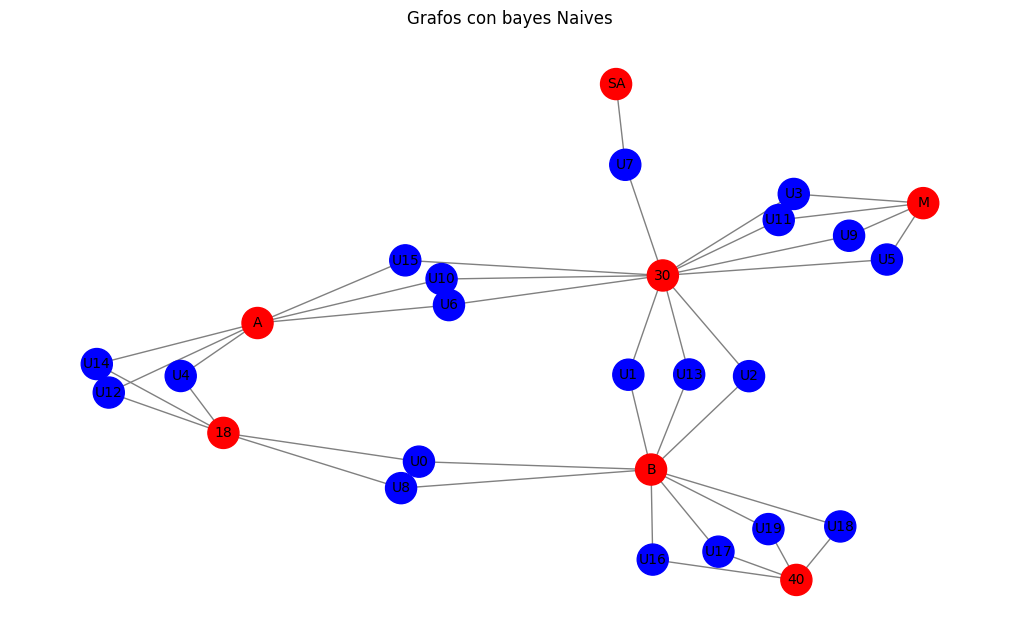

In [ ]:
pos=nx.spring_layout(G,seed=42)
color_map=['blue' if G.nodes[n].get('bipartite')==0
           else 'red' for n in G.nodes]
plt.figure(figsize=(10,6))
nx.draw(G,pos, with_labels=True, node_color=color_map,
        edge_color = 'gray',node_size=500, font_size=10)
plt.title('Grafos con bayes Naives')
plt.show()